In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [15]:
def generate_dataset():

    # set seed for reproducibility
    np.random.seed(5)

    # Synthetically generated random variables
    monthly_income = np.random.randint(1000, 10000, size=10000) # use random.Generator.integers instead
    time_of_month = np.random.randint(1, 32, size=10000)
    savings = np.random.choice(['low', 'medium', 'high'], size=10000)
    guests = np.random.binomial(1, 0.1, size=10000)

    # Function to determine quality_of_food based on the specified rules
    def determine_quality(income, time, savings, guests):
        # Determine quality based on income
        quality_based_on_income = np.where(
            income >= 7000, 5, 
            np.where(income >= 4000, 4, 
            np.where(income >= 3000, 3, 
            np.where(income >= 2000, 2, 1)))
            )


        # Determine quality based on time of month
        quality_based_on_time = np.where(time >= 16, 1, 5)


        # Determine quality based on size of savings
        #quality_based_on_savings = np.where(savings == 'high', 5, np.where(savings == 'medium', 3, 1))

        quality_based_on_savings = np.where(
            savings == 'high', 5, 
            np.where(savings == 'low', 1, 3)
            )

        # Determine quality based on number of guests
        quality_based_on_guests = np.where(
            guests == 0, 3, 5
        )
        # work on not hard-coding the values for guests  # TODO
        #np.where(
            #guests == 0, 
            #np.random.choice([1, 2, 3, 4, 5], p=[0.2, 0.2, 0.2, 0.2, 0.2]), 
            #np.random.choice([1, 4, 5], p=[0.01, 0.49, 0.5])
            #)


        # Combine the factors to get the final quality_of_food
        quality_of_food = (quality_based_on_income * 0.4 + quality_based_on_time * 0.1 + quality_based_on_savings * 0.2 + quality_based_on_guests * 0.3) / 1
        noise = np.random.normal(scale = 1, size=len(quality_of_food))  # Introduce random noise
        quality_of_food += noise
        quality_of_food = np.clip(quality_of_food, 1, 5)  # Clip values to ensure they are in the desired range
        # round to 2 decimal places
        quality_of_food = np.round(quality_of_food, 2)

        return quality_of_food.astype(float)

    # Generate quality_of_food based on the rules
    quality_of_food = determine_quality(monthly_income, time_of_month, savings, guests)

    # Create bin_edges for the quality_of_food for visualization
    bin_edges = np.where(quality_of_food <= 1, 1, np.where(quality_of_food <= 2, 2, np.where(quality_of_food <= 3, 3, np.where(quality_of_food <= 4, 4, 5))))

    # Combine all variables into a dataset
    dataset = {
        'quality_of_food': quality_of_food,
        'monthly_income': monthly_income,
        'time_of_month': time_of_month,
        'savings': savings,
        'guests': guests,
        'bin_edges': bin_edges
    }

    df = pd.DataFrame(dataset)

    return df

# Generate the dataset
df = generate_dataset()



In [4]:
df.head(10)

,quality_of_food,monthly_income,time_of_month,savings,guests,bin_edges
0,3.69,3915,16,high,0,4
1,2.54,3254,18,medium,0,3
2,2.77,5079,26,low,0,3
3,3.56,4046,25,low,0,4
4,3.10,8286,21,high,0,4
5,4.41,6520,16,high,0,5
6,3.49,2032,2,medium,0,4
7,1.57,1740,18,medium,1,2
8,2.22,2982,6,medium,0,3
9,1.00,3459,27,medium,0,1


Text(0, 0.5, 'Quality of Food')

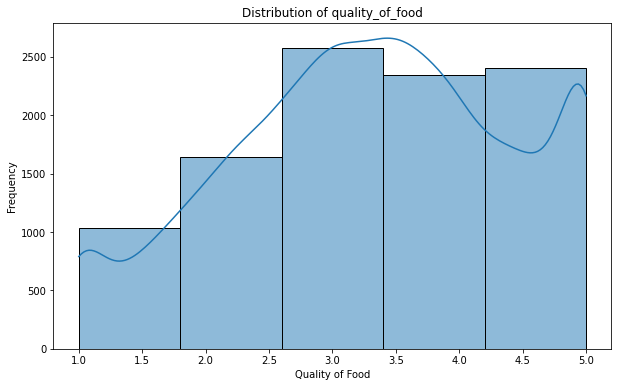

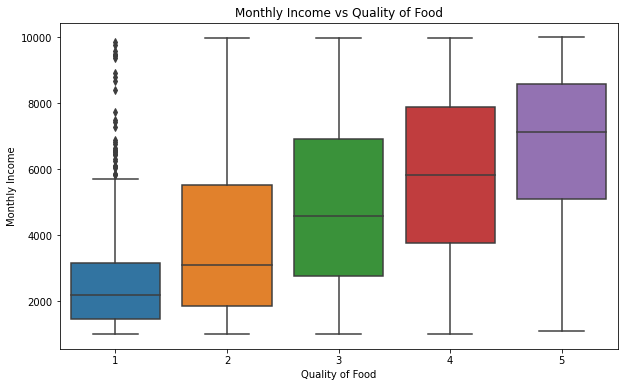

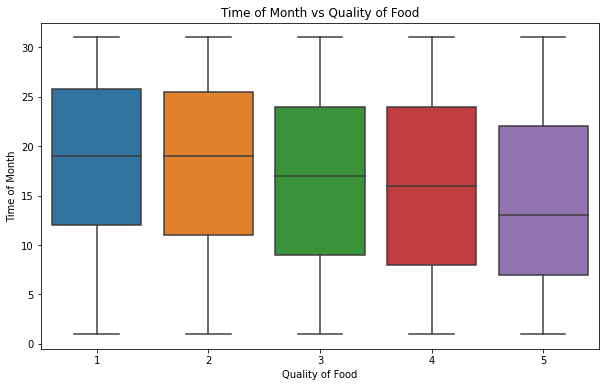

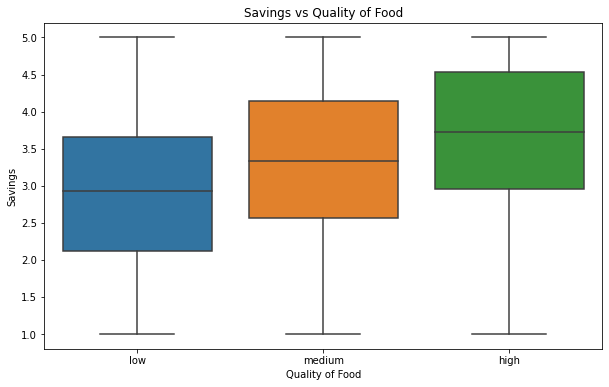

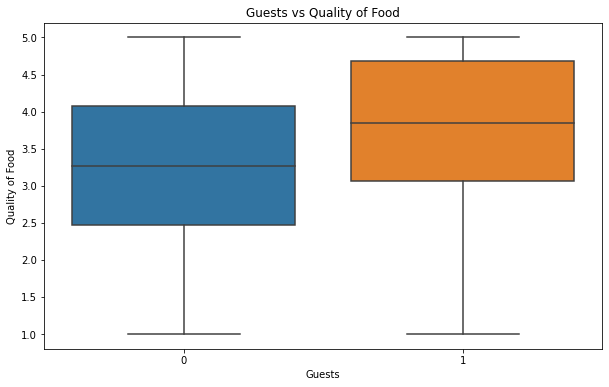

In [21]:

# visualise the data
# histogram of quality_of_food

plt.figure(figsize=(10, 6))

sns.histplot(df['quality_of_food'], bins=5, kde=True)
plt.title('Distribution of quality_of_food')
plt.xlabel('Quality of Food')
plt.ylabel('Frequency')




# monthly income vs quality of food
plt.figure(figsize=(10, 6))
sns.boxplot(x='bin_edges', y='monthly_income', data=df)
plt.title('Monthly Income vs Quality of Food')
plt.xlabel('Quality of Food')
plt.ylabel('Monthly Income')

# time of month vs quality of food
plt.figure(figsize=(10, 6))
sns.boxplot(x='bin_edges', y='time_of_month', data=df)
plt.title('Time of Month vs Quality of Food')
plt.xlabel('Quality of Food')
plt.ylabel('Time of Month')

# savings vs quality of food
plt.figure(figsize=(10, 6))
sns.boxplot(x='savings', y='quality_of_food', data=df, order=['low', 'medium', 'high'])
plt.title('Savings vs Quality of Food')
plt.xlabel('Quality of Food')
plt.ylabel('Savings')

# guests vs quality of food
plt.figure(figsize=(10, 6))
# boxplot
sns.boxplot(x='guests', y='quality_of_food', data=df)
# scatter plot
#sns.scatterplot(x='quality_of_food', y='guests', data=df)

plt.title('Guests vs Quality of Food')
plt.xlabel('Guests')
plt.ylabel('Quality of Food')



In [17]:
df.head(10)

,quality_of_food,monthly_income,time_of_month,savings,guests,bin_edges
0,3.69,3915,16,high,0,4
1,2.54,3254,18,medium,0,3
2,2.77,5079,26,low,0,3
3,3.56,4046,25,low,0,4
4,3.10,8286,21,high,0,4
5,4.41,6520,16,high,0,5
6,3.49,2032,2,medium,0,4
7,1.57,1740,18,medium,1,2
8,2.22,2982,6,medium,0,3
9,1.00,3459,27,medium,0,1


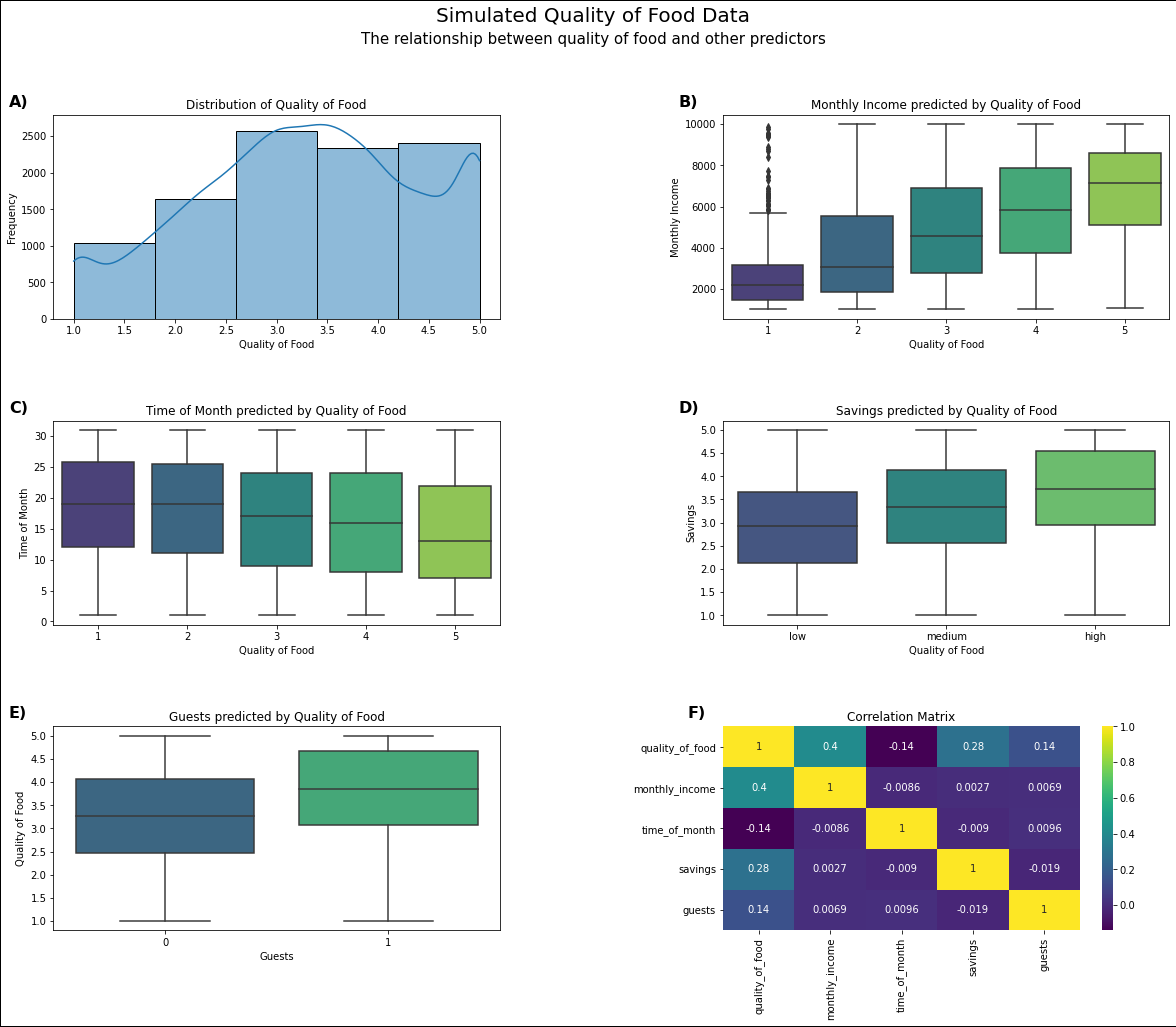

In [77]:
# same as chunk above, but put all the plots in one figure
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# set the title of the plot main title 
fig.suptitle('Simulated Quality of Food Data', fontsize=20)

# subtitle of the plot
fig.text(0.5, 0.95, 'The relationship between quality of food and other predictors', ha='center', va='center', fontsize=15)
#fig.suptitle('The relationship between quality of food and other predictors')

# add an edge around the plot
fig.patch.set_edgecolor('black')
fig.patch.set_linewidth('2')

# add a line between the panels
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# give the subplots letters in the top left corner
axs[0, 0].text(-0.1, 1.1, 'A)', transform=axs[0, 0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[0, 1].text(-0.1, 1.1, 'B)', transform=axs[0, 1].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1, 0].text(-0.1, 1.1, 'C)', transform=axs[1, 0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1, 1].text(-0.1, 1.1, 'D)', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold', va='top')
axs[2, 0].text(-0.1, 1.1, 'E)', transform=axs[2, 0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[2, 1].text(-0.1, 1.1, 'F)', transform=axs[2, 1].transAxes, fontsize=16, fontweight='bold', va='top')



sns.histplot(df['quality_of_food'], bins=5, kde=True, ax=axs[0, 0], palette = 'viridis') # use a viridis color
axs[0, 0].set_title('Distribution of Quality of Food')
axs[0, 0].set_xlabel('Quality of Food')
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(x='bin_edges', y='monthly_income', data=df, ax=axs[0, 1], palette = 'viridis')
axs[0, 1].set_title('Monthly Income predicted by Quality of Food')
axs[0, 1].set_xlabel('Quality of Food')
axs[0, 1].set_ylabel('Monthly Income')

sns.boxplot(x='bin_edges', y='time_of_month', data=df, ax=axs[1, 0], palette = 'viridis')
axs[1, 0].set_title('Time of Month predicted by Quality of Food')
axs[1, 0].set_xlabel('Quality of Food')
axs[1, 0].set_ylabel('Time of Month')

sns.boxplot(x='savings', y='quality_of_food', data=df, order=['low', 'medium', 'high'], ax=axs[1, 1], palette = 'viridis')
axs[1, 1].set_title('Savings predicted by Quality of Food')
axs[1, 1].set_xlabel('Savings')
axs[1, 1].set_ylabel('Quality of Food')

sns.boxplot(x='guests', y='quality_of_food', data=df, ax=axs[2, 0], palette = 'viridis')
axs[2, 0].set_title('Guests predicted by Quality of Food')
axs[2, 0].set_xlabel('Guests')
axs[2, 0].set_ylabel('Quality of Food')

# visualize all the predictors in one plot using correlation matrix and heatmap put in the last subplot
#corr = df.corr()
#sns.heatmap(corr, annot=True, ax=axs[1, 2])


# encode savings as numerical values
corr = df.copy()
corr['savings'] = corr['savings'].map({'low': 1, 'medium': 2, 'high': 3})
# remove bin_edges column
corr = corr.drop('bin_edges', axis=1).corr()
sns.heatmap(corr, annot=True, ax=axs[2, 1], cmap='viridis')

axs[2, 1].set_title('Correlation Matrix')




plt.subplots_adjust() # alternatives are: tight_layout() or constrained_layout() or subplots_adjust() or plt.subplots_adjust()

plt.show()

# save the plot
fig.savefig('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/ThesisPlots/quality_of_food.png')


In [5]:
# remove bin_edges
df = df.drop('bin_edges', axis=1)

# rename quality_of_food to target
df = df.rename(columns={'quality_of_food': 'target'})

In [6]:
# write the data to a csv file
df.to_csv('quality_of_food.csv', index=False)

In [4]:
def generate_classification_dataset():

    # set seed for reproducibility
    np.random.seed(5)

    # Synthetically generated random variables
    monthly_income = np.random.randint(1000, 10000, size=10000) # use random.Generator.integers instead
    time_of_month = np.random.randint(1, 32, size=10000)
    savings = np.random.choice(['low', 'medium', 'high'], size=10000)
    guests = np.random.binomial(1, 0.1, size=10000)

    # Function to determine quality_of_food based on the specified rules
    def determine_quality(income, time, savings, guests):
        # Determine quality based on income
        quality_based_on_income = np.where(
            income >= 7000, 5, 
            np.where(income >= 4000, 4, 
            np.where(income >= 3000, 3, 
            np.where(income >= 2000, 2, 1)))
            )


        # Determine quality based on time of month
        quality_based_on_time = np.where(time >= 16, 1, 5)


        # Determine quality based on size of savings
        quality_based_on_savings = np.where(savings == 'high', 5, np.where(savings == 'medium', 3, 1))

        # Determine quality based on number of guests
        quality_based_on_guests = np.where(
            guests == 0, 3, 5
        )
        # work on not hard-coding the values for guests  # TODO
        #np.where(
            #guests == 0, 
            #np.random.choice([1, 2, 3, 4, 5], p=[0.2, 0.2, 0.2, 0.2, 0.2]), 
            #np.random.choice([1, 4, 5], p=[0.01, 0.49, 0.5])
            #)


        # Combine the factors to get the final quality_of_food
        quality_of_food = (quality_based_on_income * 0.4 + quality_based_on_time * 0.1 + quality_based_on_savings * 0.2 + quality_based_on_guests * 0.3) / 1
        noise = np.random.normal(scale = 1, size=len(quality_of_food))  # Introduce random noise
        quality_of_food += noise
        quality_of_food = np.clip(quality_of_food, 1, 5)  # Clip values to ensure they are in the desired range
        # round to 2 decimal places
        quality_of_food = np.round(quality_of_food, 2)

        return quality_of_food.astype(int)

    # Generate quality_of_food based on the rules
    quality_of_food = determine_quality(monthly_income, time_of_month, savings, guests)

    # Create bin_edges for the quality_of_food for visualization
    bin_edges = np.where(quality_of_food <= 1, 1, np.where(quality_of_food <= 2, 2, np.where(quality_of_food <= 3, 3, np.where(quality_of_food <= 4, 4, 5))))

    # Combine all variables into a dataset
    dataset = {
        'quality_of_food': quality_of_food,
        'monthly_income': monthly_income,
        'time_of_month': time_of_month,
        'savings': savings,
        'guests': guests,
        'bin_edges': bin_edges
    }

    df = pd.DataFrame(dataset)

    return df

# Generate the dataset
df = generate_classification_dataset()
    

In [7]:
df.head(10)
# counnt number of target values for all values of target
df['quality_of_food'].value_counts()
# percent chance of each target value
df['quality_of_food'].value_counts(normalize=True)

3    0.3247
2    0.2518
4    0.2013
1    0.1363
5    0.0859
Name: quality_of_food, dtype: float64

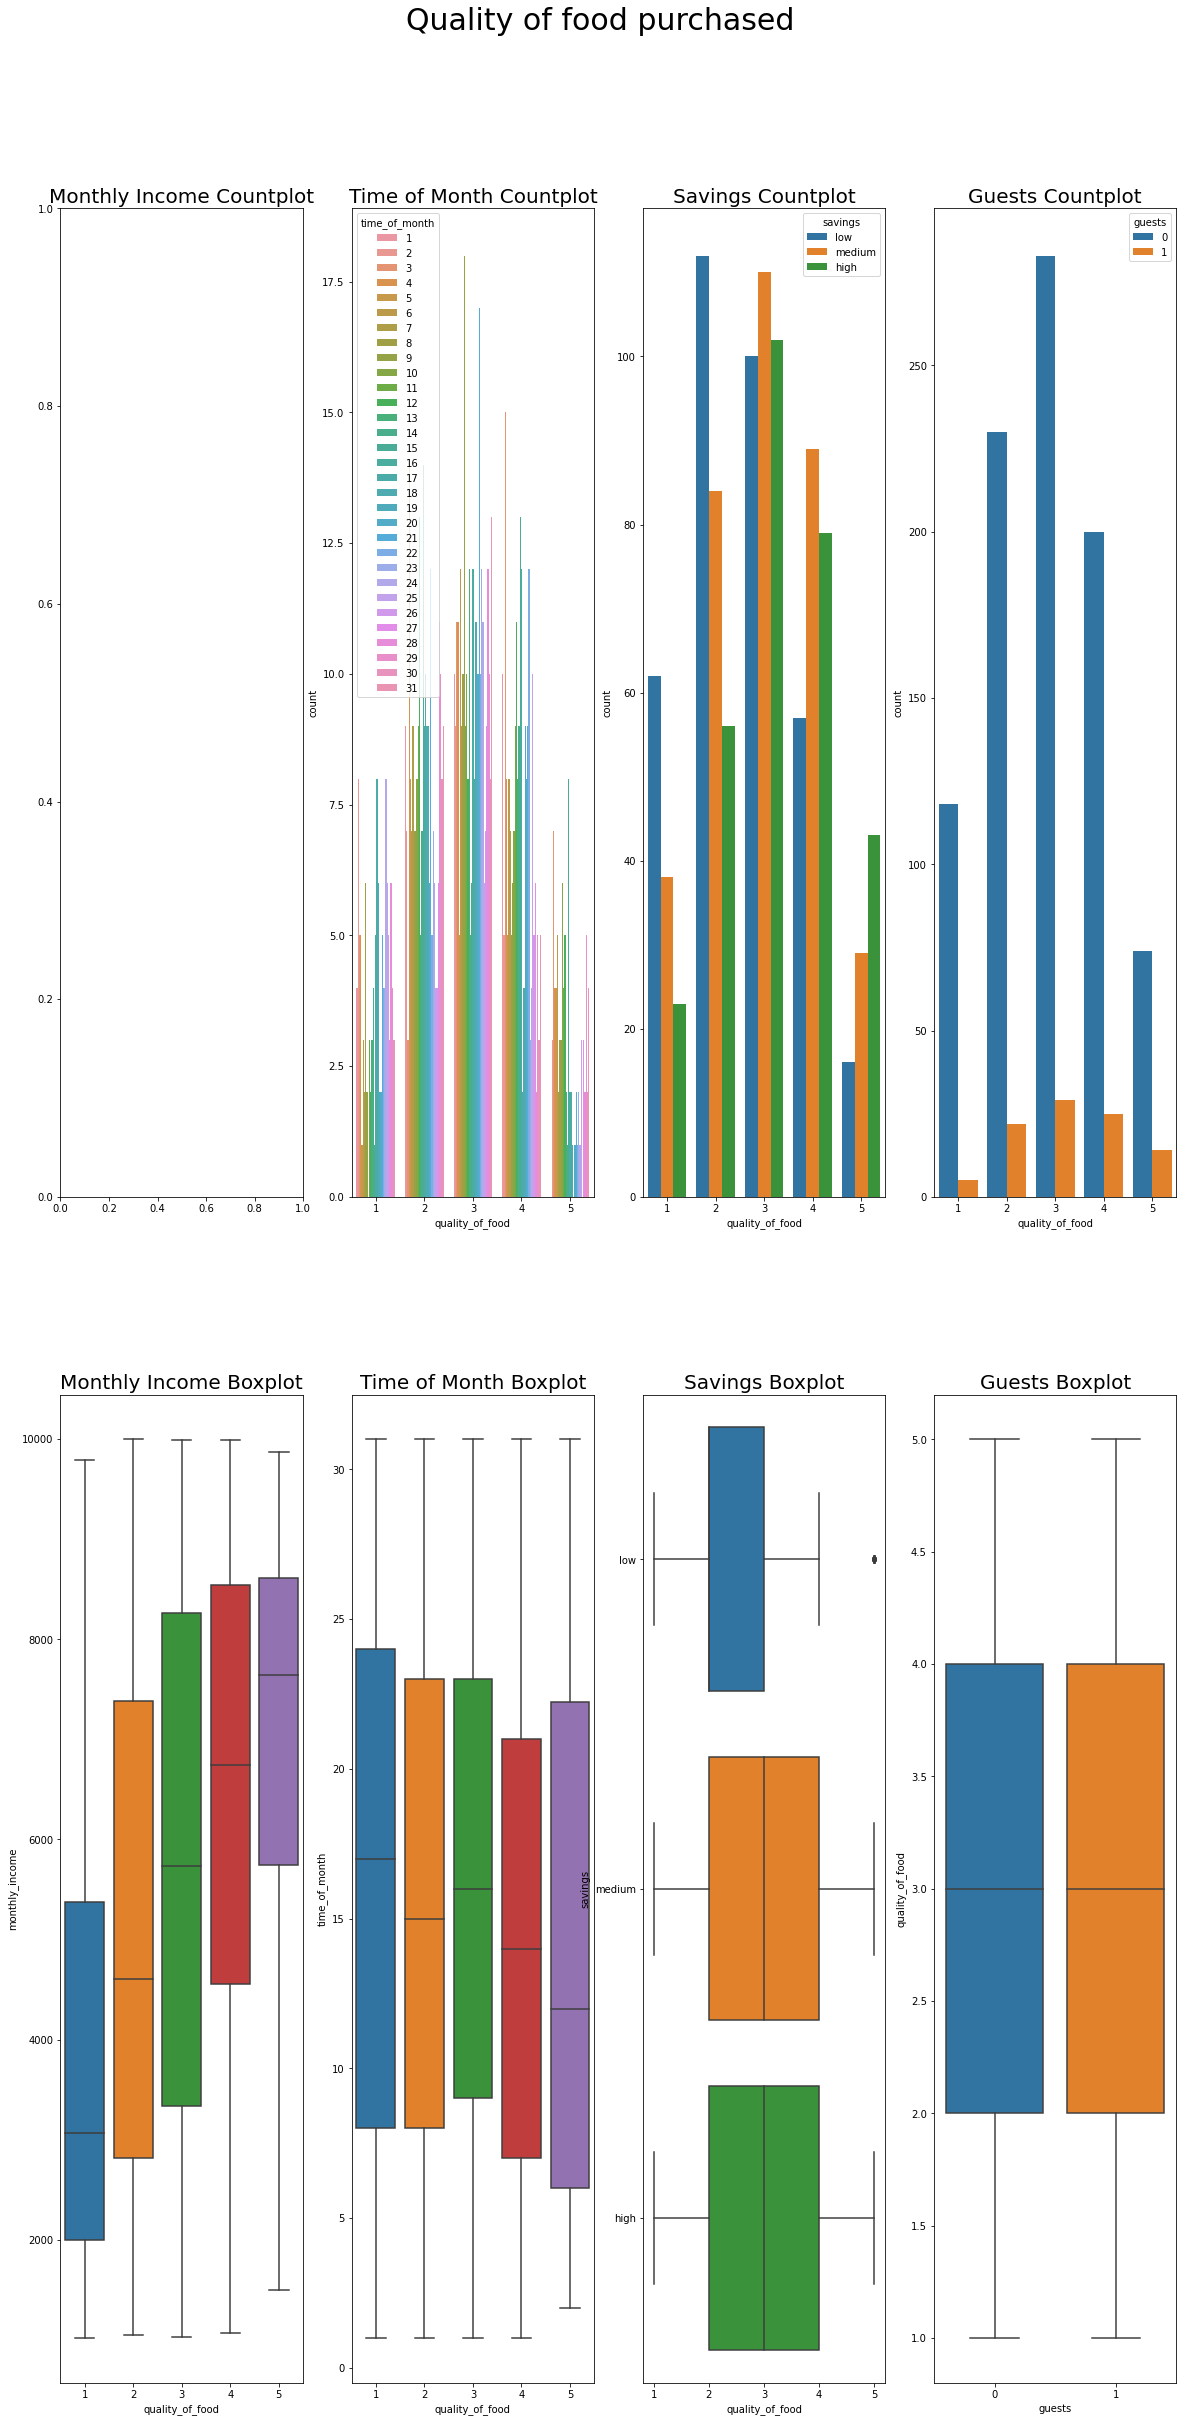

In [7]:
# visualize the data
# this chunk will work for integer data

fig, axes = plt.subplots(2, 4, figsize=(20, 40))


sns.boxplot(x='quality_of_food', y='monthly_income', data=df, ax=axes[1, 0])
sns.countplot(x='quality_of_food', hue='time_of_month', data=df, ax=axes[0, 1])
sns.boxplot(x='quality_of_food', y='time_of_month', data=df, ax=axes[1, 1])
sns.countplot(x='quality_of_food', hue='savings', hue_order= ['low', 'medium', 'high'], data=df, ax=axes[0, 2])
sns.boxplot(x='quality_of_food', y='savings', order= ['low', 'medium', 'high'], data=df, ax=axes[1, 2])
sns.countplot(x='quality_of_food', hue='guests', data=df, ax=axes[0, 3])
sns.boxplot(x='guests', y='quality_of_food', data=df, ax=axes[1, 3])

# set title for each column
axes[0, 0].set_title('Monthly Income Countplot', fontsize=20)
axes[1, 0].set_title('Monthly Income Boxplot', fontsize=20)

axes[0, 1].set_title('Time of Month Countplot', fontsize=20)
axes[1, 1].set_title('Time of Month Boxplot', fontsize=20)

axes[0, 2].set_title('Savings Countplot', fontsize=20)
axes[1, 2].set_title('Savings Boxplot', fontsize=20)

axes[0, 3].set_title('Guests Countplot', fontsize=20)
axes[1, 3].set_title('Guests Boxplot', fontsize=20)

# set the title of the figure and place it at the top of the figure and minimize the space between the title and the figure
fig.suptitle('Quality of food purchased' , fontsize=30, y=.95)

# save the figure
plt.savefig('quality_of_food_int.png')

plt.show()

In [9]:
# remove bin_edges
df = df.drop('bin_edges', axis=1)

# rename quality_of_food to target
df = df.rename(columns={'quality_of_food': 'target'})

# save the data to a csv file
df.to_csv('quality_of_food_int.csv', index=False)